# Support Vector Machines (SVM)
SVM (Maquinas de soporte vectorial). Es una herramienta de clasificacion.

Historia:
* Ruso Vladimir Vapnik en 1960s invento el metodo. Parte de su tesis de doctorado.
* El metodo no tuvo mucho exito, por que la computacion no estaba muy buena para recibir este metodo.
* En 1992 Vladimir sometio 3 articulos a
[Conference of Neural Information Processing Systems](https://en.wikipedia.org/wiki/Conference_on_Neural_Information_Processing_Systems). Ninguno fue aceptado.
* Vladimir emigro a Estados Unidos a trabajar con Bell Laboritories.
* En un reunion (tomando cafe) con un companero de trabajo, lo reto a probar metodos distintos al SVM para la clasficiacion de carateres (tipo MNIST) y el companhero encontro que SVM era un metodo muy poderoso.
* A raiz de esto y del "kernel trick" (De Isabel Guyen?) lo explico mas adelante el metodo de SVM gano popularidad y hoy es uno de los preferidos.

## Motivacion.




Ver trazos a mano alzada.
Motivacion en 2D
En **regression lineal** la funcion objetivo $J(a,b)$ trata de
minimizar las diferencias (verticales) entre los punots $(x_i,y_i)$ y la linea $y = ax + b$.  Es decir

$$ \min J(a,b) = \frac{1}{2m} \sum_{i=1}^m ( y_i - (a x_i + b))^2 .$$

En SVM se trata de **separar** dos grupos (clases) de puntos
de la mejor forma. Para esto se quiere maximizar la
distancia al cuadrado (**perpendicular**) de los puntos a una racta de pendiente $a$ e intercepto $b$. Es decir, aca



$$ \max J(a,b) = \frac{1}{2m} \sum_{i=1}^m d^2[(x_i, y_i), L(a,b)].$$

## Aplicaciones: Muchas, google it.

[Por ejemplo](https://en.wikipedia.org/wiki/Support_vector_machine).

## Hiperplanos y vectores de soporte.


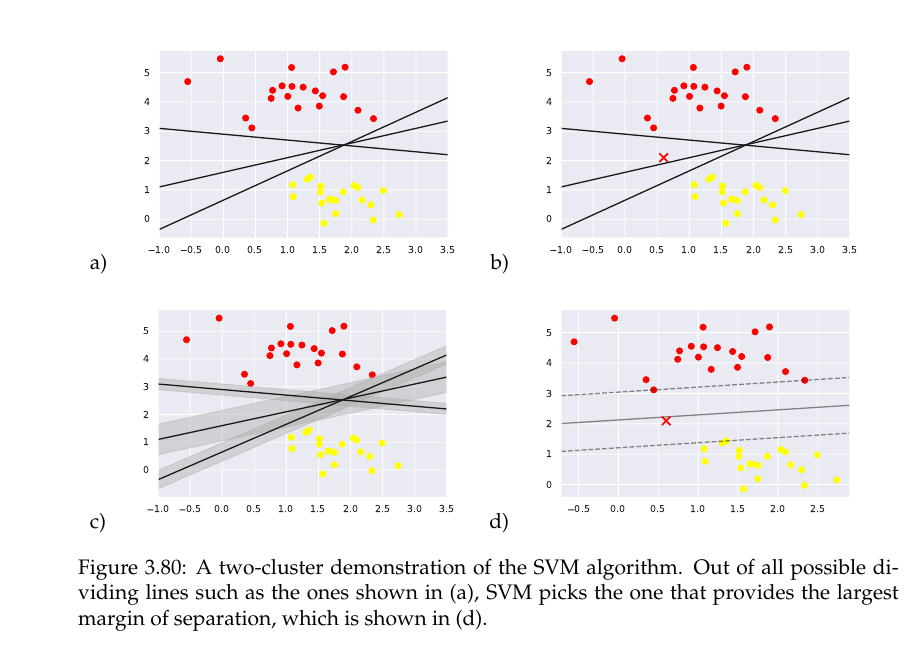

La figura 3.80 fue explicada oralmente en clase.

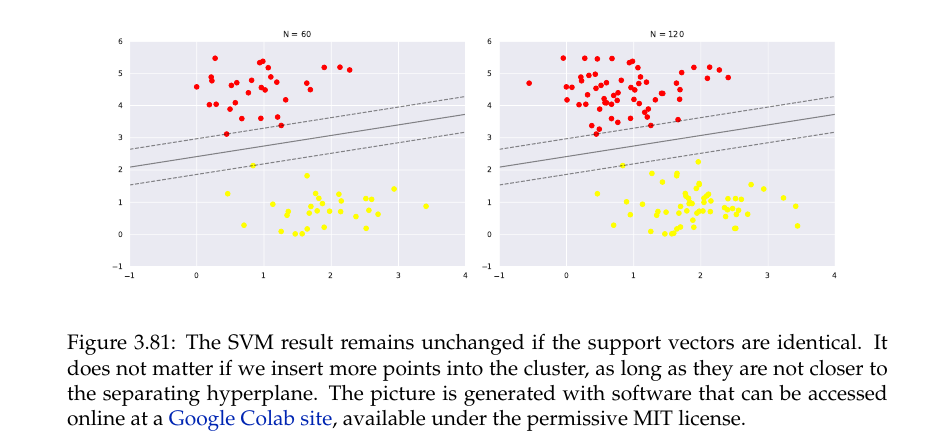

## Funcion de costo de SVM.

Pensemos en 2D por facilidad, luego generalizamos.
Asumimos que tenemos una coleccion de puntos que son **linealmente separables** (mas adelante vemos que pasa para los no linealmente separables). Los puntos son $x^{(1)}, x^{(2)}, \cdots, x^{(m)} $. Los puntos tienen coordenadas $(x_1, x_2)^{(1)}, (x_1, x_2)^{(2)}, \cdots, (x_1, x_2)^{(m)} $
Estos puntos tienen etiquetas (por eso este metodo es supervisado). Veamos una figura donde por simplicidad solo consideramos 4 puntos y las etiquetas son $+$ y $-$.



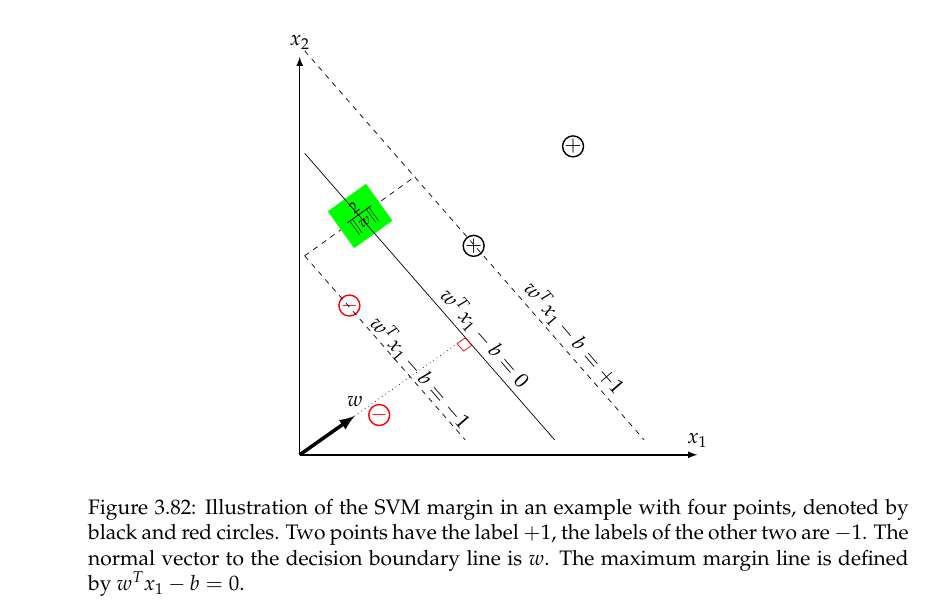

Inicialmente pensemos en $\mathbb{R}^2$.
$$x_2 = a x_1 - b $$
$$ 0 = ax_1 - x_2 - b $$
Vectoricemos esta ecuacion.


$$ 0 = \binom{a}{-1}^T \binom{x_1}{x_2} - b.$$
Podemos escribir esto como

$$ 0 = w^T x - b .$$
esta ultima ecuacion generaliza el problema a cualquier numero de dimensiones. Aca $w$ es un vector perpendicular a la recta (hiperplano) y $b$ es el intercepto.

En general podemos pensar en una ecuacion extendida que es:

Para $\delta > 0 $.
$$ \delta = w^T x - b .$$
Con esto evaluamos los puntos de la siguiente forma.

$$w^T x^{(i)} - b \ge 0  \quad, \quad \text{si   } y^{(i)} = 1 .$$
$$w^T x^{(i)} - b < 0  \quad, \quad \text{si   } y^{(i)} = -1 .$$

Para un punto de estos podemos pensar en $\delta$ y escribir

$$w^T x^{(i)} - b = \delta  \quad, \quad \text{si   } y^{(i)} = 1 .$$
$$w^T x^{(i)} - b =-\delta \quad, \quad \text{si   } y^{(i)} = -1 .$$

Estas dos ecuaciones se pueden escribir en una sola.

$$y^{(i)} ( w^T x^{(i)} - b) = \delta  \tag{0}.$$

Consideremos los dos planos

$$ w^T x - b = \pm \delta \tag{1} .$$

Recuerden una de las primeras tareas de la seccion de algebra lineal. La distancia entre estos dos planos es


$$\text{doble del margen}= \frac{2 \delta}{ \| w \|} .$$

Yo puedo decir, sin perdida de generalidad que $\delta=1$.
Si no, dividamos la ecuacion (1) por $\delta$, entonces
podemos definir un nuevo $w \leftarrow w/\delta$, y lo mismo un
nuevo $b \leftarrow b/\delta$ y $\delta$ en la derecha como $\delta/\delta=1$.

La ecuacion (0) la cambiamos por

$$y^{(i)} ( w^T x^{(i)} - b) = 1  \tag{2}.$$

Mas generalmente podemos definir la siguiente ecuacion

$$y^{(i)} ( w^T x^{(i)} - b) \ge 1  \tag{3}.$$
Esta ultima ecuacion me fuerza a considerar puntos sobre las "bermas"

Ta tenemos los elementos para defnir nuestro problema como un problema de **optimizacion**.

Queremos maximizar $2/\| w \|$. Como nosotros estamos acostumbrados a minimizar y no a maximizar entonces minimicemos el inverso. Es decir minimicemos $\|w \|/2$, pero mas aun, como estamos a costumbrados a los cuadrados (los cuadrados son convenientes por que las normas 2, son raices cuadradas y los cuadrados nos eliminan las raices cuadradas, y los mas importante los extremos -minimo/maximo- se conservan). Entonces llegamos a la formulacion del problema.


$$\min \frac{\| w \|^2}{2} \quad \text{sujeto a} \quad y^{(i)}(w^T x^{(i)} - b ) \ge 1 .$$

Este es un problema de multiplicadores de Lagrange.

## Kernels:

La idea de los kernels es extender el metodo de SVM a separaciones no lineales. No todos los puntos son linealmente separables. Piense en puntos rojos en un circulo y verdes en otro circulo de radio mayor. No se pueden separar por un hiperplano.

La grafica siguiente ilustra en 1D un conjunto de puntos (cuadrados rojos y triangulos verdes) que no se pueden separar por un hiperplano (como son en 1D el hiperplano seria un punto).



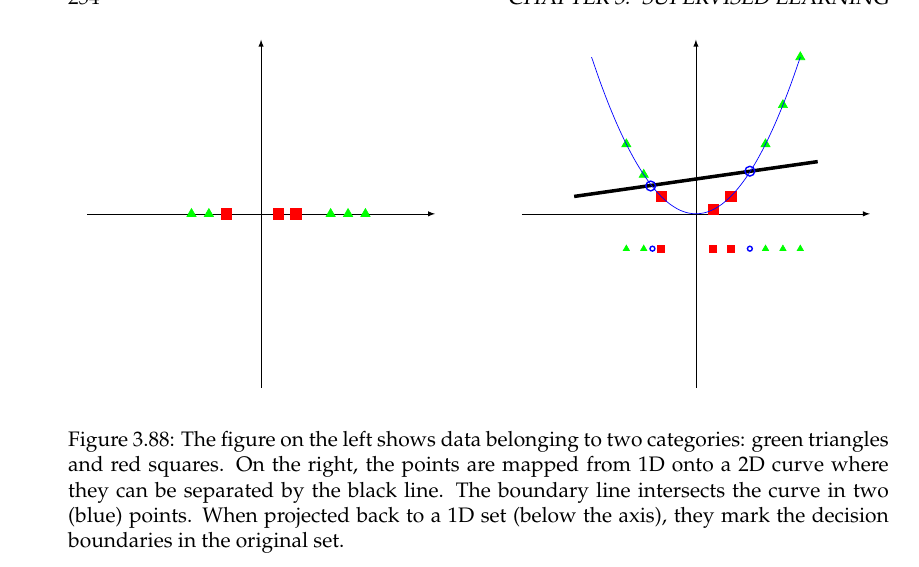

Tenemos una serie de puntos en 1D $x_1, x_2, \cdots, x_m$.
Los puntos estan "revueltos" no se pueden separar por un solo punto (un hiperplano en 1D).
El siguiente algoritmo nos separa los puntos, en el ejemplo de la grafica.


* Entonces levantamos los puntos sobre una parabola $y=x^2$, es decir, $(x_1, x_1^2), (x_2, x_2^2), \cdots (x_m, x_m^2)$. En 2D estos puntos son separables.

* Estamos ya en 2D y aca encontramos un hiperplano (la linea negra) que separa los puntos.

* La interseccion de la linea negra con la parabola (azul) nos da dos puntos.

* proyectamos los dos puntos al conjunto 1D de inicio. Estos dos puntos, proyecteados, son el "boundary" (frontera de decision).

Que tal si los puntos estan todos localizados a un lado del eje $y$.

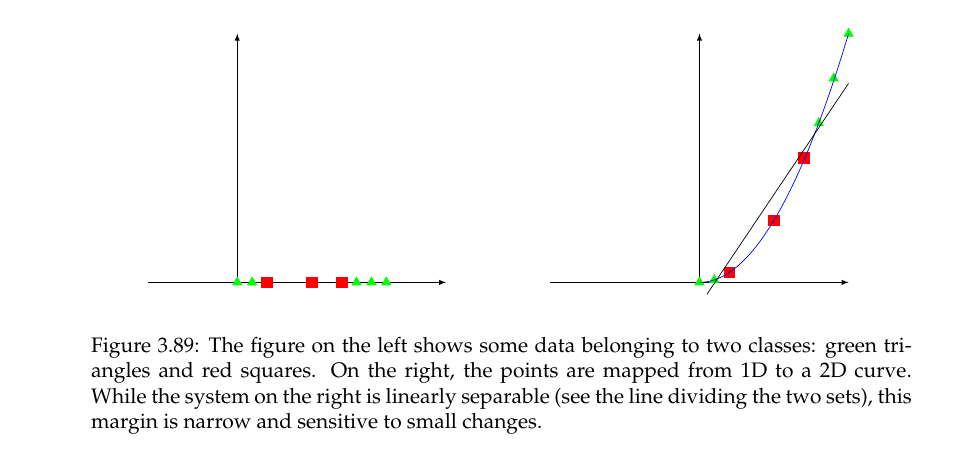

De la Figura 3.89 se ve que es posible separalos pero la margen es mas estrecha. No es tan optimo. Que hacemos en este caso?

* Removemos la media. Es decir
Si $\mu = \frac1m \sum_1^m x_i$

$$ x_i \mapsto  x_i - \mu .$$

* Aplicamos el kernel (en el ejemplo kernel$(x)=x^2$), es decir
tenemos $(x_i - \mu, (x_i - \mu)^2) $

* En este momento la separacion es optima. Volemos al problema de la Figura 3.88.  Separamos con un plano, y proyectamos las interseccion de este plano con el kernel al "piso".

* En este momento podemos recuperar los puntos a su posicion inicial y sumar la media.

## Kernels en varias dimensiones.
Tomemos la siguiente figura.

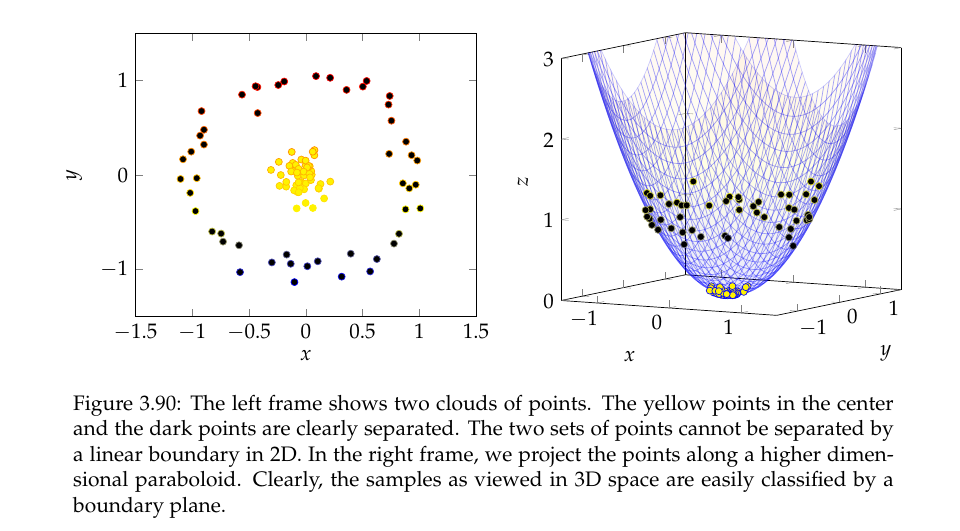

La idea es la misma de antes, pero los puntos $(x_i, y_i)$ se levantan sobre una paraboloide $z=x^2 + y^2$, en este caso
$(x_i, y_i, x_i^2 + y_i^2)$ en 3D. Levamos de 2D a 3D.

Cuando los separamos, resulta algo como la Figura 3.91

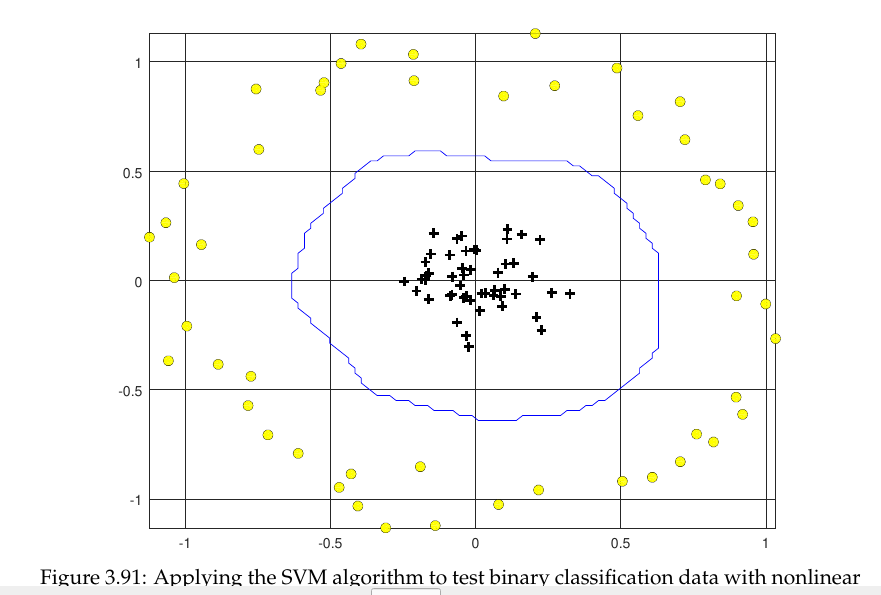